In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Reading dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [24]:
train.shape


(891, 12)

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex'>

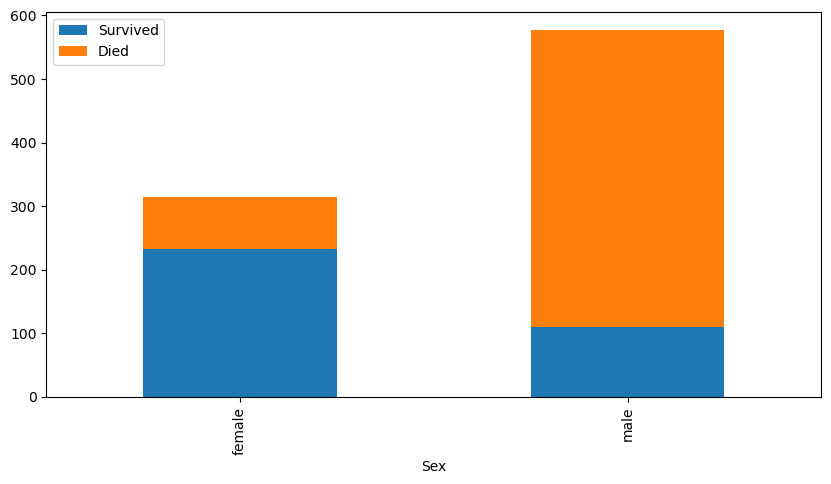

In [27]:
# Visualixing survivals based on gender
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(10, 5),stacked=True)

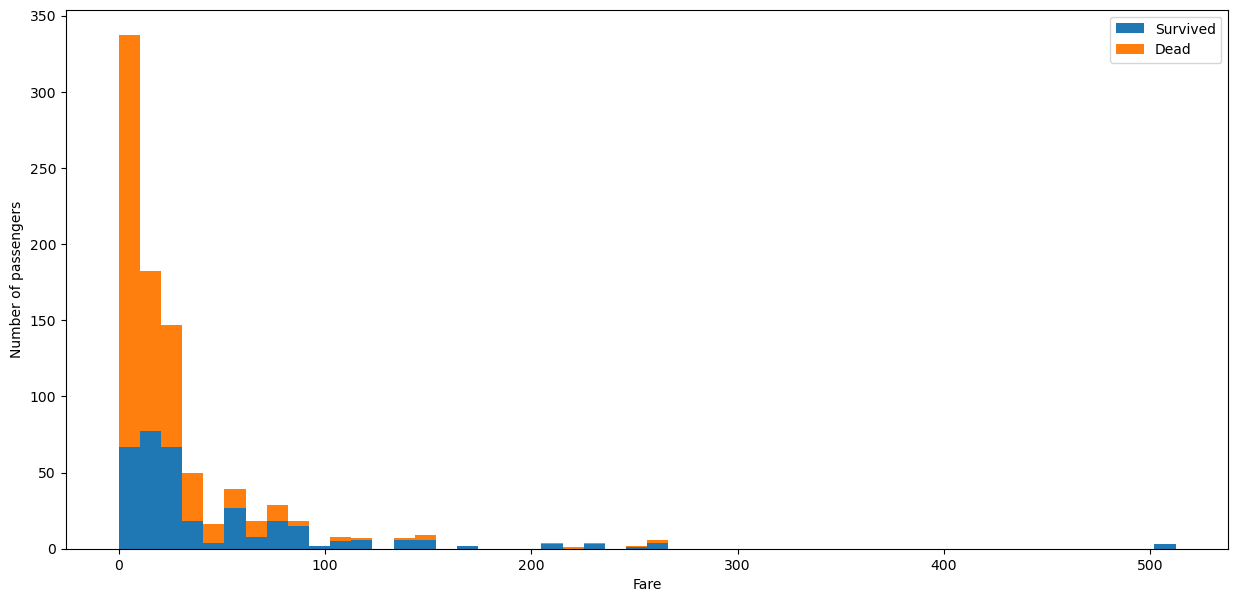

In [28]:
# Visualizing survivals based on fare
figure = plt.figure(figsize=(15, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']],stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [29]:
# Cleaning the data by removing irrelevant columns
df1 = train.drop(['Name','Ticket','Cabin','PassengerId','Died'],axis =1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [30]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [31]:
# Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df1.Sex = df1.Sex.map({'Female':0, 'male':1})
df1.Embarked = df1.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0
1,1,1,NaN,38.0,1,0,71.2833,1
2,1,3,NaN,26.0,0,0,7.9250,0
3,1,1,NaN,35.0,1,0,53.1000,0
4,0,3,1.0,35.0,0,0,8.0500,0


In [32]:
# Mean age of each sex
mean_age_men=df1[df1['Sex']==1]['Age'].mean()
mean_age_women=df1[df1['Sex']==0]['Age'].mean()

In [33]:
# Filling all the null values in 'Age' with respective mean age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=mean_age_men

In [34]:
df1.isnull().sum()


Survived      0
Pclass        0
Sex         314
Age          53
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [35]:
df1.dropna(inplace = True)

In [36]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
# Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.0,577.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,1.0,0.380832,0.429809,0.235702,0.049819
std,0.391775,0.813580,0.0,0.163391,1.061811,0.612294,0.084200
min,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,0.283740,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.0,0.380832,0.000000,0.000000,0.020495
75%,0.000000,3.000000,1.0,0.434531,0.000000,0.000000,0.051822
max,1.000000,3.000000,1.0,1.000000,8.000000,5.000000,1.000000


In [38]:
# Splitting the data for trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df1.drop(['Survived'], axis = 1),
df1.Survived,
test_size = 0.2,
random_state=0,
stratify=df1.Survived)

In [43]:
from sklearn.linear_model import LogisticRegression
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict = lrmod.predict(X_test)
accuracy_score(y_test, y_predict)

0.8189655172413793

<AxesSubplot:>

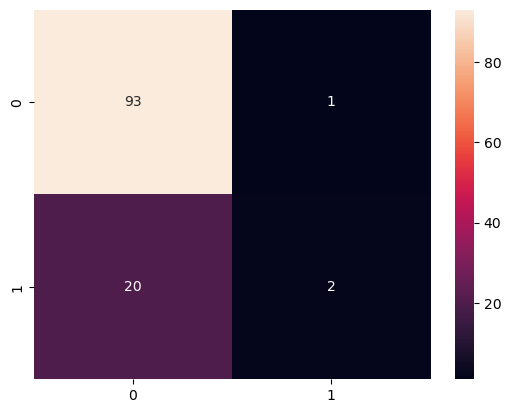

In [44]:
# Confusion Matrinx
from sklearn.metrics import confusion_matrix
cma = confusion_matrix(y_test, y_predict)
sns.heatmap(cma, annot=True)

In [45]:
# Test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# cleaning the data by removing irrelevant columns
df2 = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [47]:
# Converting the categorical features 'Sex' and 'Embarked' into numericcl values 0 & 1
df2.Sex = df2.Sex.map({'female':0, 'male':1})
df2.Embarked = df2.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})
df2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
5,3,1,14.0,0,0,9.2250,0
6,3,0,30.0,0,0,7.6292,2
7,2,1,26.0,1,1,29.0000,0
8,3,0,18.0,0,0,7.2292,1
9,3,1,21.0,2,0,24.1500,0


In [48]:
# Let's check for the null values
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [49]:
#Finding mean age
mean_age_men2=df2[df2['Sex']==1]['Age'].mean()
mean_age_women2=df2[df2['Sex']==0]['Age'].mean()

In [50]:
#Filling all the null values in 'Age' and 'Fare' with respective mean age and mean fare
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=mean_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=mean_age_men2
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [51]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))
df2.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.396975,0.447368,0.392344,0.069540
std,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,3.000000,1.000000,0.396972,0.000000,0.000000,0.028213
75%,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000


In [53]:
prediction = lrmod.predict(df2)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [56]:
prediction_df = pd.read_csv('submission.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

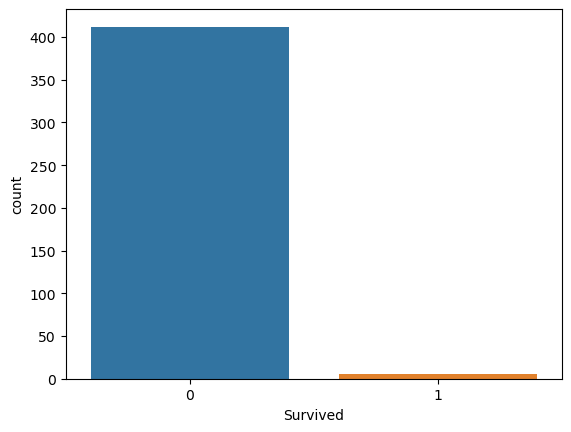

In [57]:
# Visualizing predicted values
sns.countplot(x='Survived', data=prediction_df)
